# Look-up table plots

# 1 Look up tables

### 1.1) Importing data from the simulations (as provided by Calum)

In [1]:
import pandas as pd

file = "LookUpTables/light.xlsx"
df_light = pd.read_excel(file)

df_light.head()

Light value        p1        p2        p3        p4          T1  \
0          0.6  0.954545  0.621005  0.136986  0.779412  154.529762   
1          0.7  0.975000  0.647208  0.109137  0.796078  129.773026   
2          0.8  0.980556  0.659033  0.101781  0.772201  133.491749   
3          0.9  0.991667  0.681467  0.081081  0.745042  126.370629   
4          1.0  0.994444  0.684615  0.082051  0.767790  128.260870   

          T1F         T2        T2F         TR         T3  Pretry  
0  356.555556  32.708333  58.588235  86.900000  53.683824     0.6  
1  360.111111  32.659375  59.418919  55.116279  53.968627     0.6  
2  353.000000  32.481707  58.907692  70.100000  54.741313     0.6  
3  360.000000  31.844749  59.037500  65.095238  54.626062     0.6  
4  360.000000  31.843195  59.134615  57.625000  52.284644     0.6

In [2]:
file = "LookUpTables/frictionObject.xlsx"
df_friction_obj = pd.read_excel(file)

df_friction_obj.head()

Object friction        p1        p2        p3        p4          T1  \
0              0.5  0.977419  0.792049  0.073394  0.088803  128.296296   
1              0.6  0.973154  0.709581  0.131737  0.940928  137.059289   
2              0.7  0.982759  0.783871  0.080645  0.921811  123.496000   
3              0.8  0.993103  0.710280  0.102804  0.956140  135.500000   
4              0.9  0.982143  0.562712  0.067797  0.939759  129.117647   

       T1F         T2        T2F         TR         T3  Pretry  
0  360.000  32.273050  58.400000  88.833333  52.366795     0.6  
1  350.125  32.174242  59.085714  60.159091  53.818565     0.6  
2  360.000  31.965779  59.489362  54.200000  55.765432     0.6  
3  360.000  32.214815  58.372549  65.757576  54.548246     0.6  
4  360.000  32.240964  59.934783  63.400000  54.000000     0.6

In [3]:
file = "LookUpTables/frictionFloor.xlsx"
df_friction_floor = pd.read_excel(file)

df_friction_floor.head()

Floor friction        p1        p2        p3        p4          T1  \
0            0.25  0.945161  0.648148  0.095679  0.785714  143.345865   
1            0.30  0.981081  0.664198  0.103704  0.769517  141.833846   
2            0.35  0.988235  0.655352  0.122715  0.772908  131.530822   
3            0.40  0.992248  0.745318  0.041199  0.758794  119.696035   
4            0.45  1.000000  0.652830  0.094340  0.751445  119.933649   

          T1F         T2        T2F         TR         T3  Pretry  
0  360.058824  32.286765  58.423077  88.903226  57.195238     0.6  
1  360.000000  31.777778  58.847222  68.523810  56.304833     0.6  
2  352.250000  32.574675  59.853333  63.936170  54.509960     0.6  
3  360.000000  31.933333  59.259259  39.727273  52.864322     0.6  
4   -1.000000  32.754464  59.146341  57.800000  50.583815     0.6

### 1.2 ) Combining the three different look-up tables to create a single look-up table. The values of the system parameters are dependant on none, one or two environmental parameters.

```
Environmental parameters:
p1 = f(light)
p2 = f(object)
p3 = f(light)
p4 = f(object)      <-- modelled as a 'ramp' function
T1 = f(light,floor) <---this has to be checked
T1F = 356.5555556
T2 = 32.25871044
T2F = 59.03
TR = 65        <---- this has to be checked, before was considered as f(floor)
T3 = f(floor)
Pretry = 0.6 
```



Addressed concerns 05/12/2023
NOTE: From Jupyter Notebook 1 (1Plots_param...) the following relations have to be checked:
- p3 - considered a function of the floor but no visible trend
     - now it is a function of light 
- TR - check if only dependant of Floor (as it varies in a very large range in all of them ~[90,50]
     - **this requires more data
- T3 - assumed fixed but it seems to vary with floor and object
     - change to be function of floor friction
     
The following function from Jupyter Notebook 1 (1Plots_param...) has to be redone
- p4  - change function.
     - changed function.  Adding clause if p4=f(object) > 0.6 then p1=1

The following function has to be checked:
- T1 - as an average of light and floor, check if this makes sense.
     - it does, there is only one outliner in the data plot of floor friction


In [4]:
# Get column values from each DataFrame
columns_df1 = df_light.columns
columns_df2 = df_friction_obj.columns
columns_df3 = df_friction_floor.columns
columns = df_light.columns
df = pd.DataFrame(columns = columns)
df.insert(1, 'Floor friction', [])
df.insert(2, 'Object friction', [])


extended_rows = []

# Generate all combinations of first three colum values
for index, row_light in df_light.iterrows():
    for index, row_friction_floor in df_friction_floor.iterrows():
        for index, row_friction_obj in df_friction_obj.iterrows():
            #print(f"Index: {index}, Light value: {row['Light value']}, p1: {row['p1']}, T1F: {row['T1F']}")
            extended_rows.append({
                #env
                'Light value':row_light['Light value'],
                'Floor friction':row_friction_floor['Floor friction'],
                'Object friction':row_friction_obj['Object friction'],
                #op
                'p1': row_light['p1'],
                'p2': row_friction_obj['p2'],
                'p3': row_light['p3'],
                'p4': row_friction_obj['p4'],
                'T1': (row_light['T1']+row_friction_floor['T1'])/2,
                'T1F': 356.5555556, #fixed, value from look-up Table
                'T2': 32.25871044,  #fixed, value from look-up Table
                'T2F': 59.03,       #average
                'TR': 65,            #average, before:row_friction_floor['TR'],
                'T3': row_friction_floor['T3'],
                'Pretry': 0.6 #constant
            })

df = pd.concat([df, pd.DataFrame(extended_rows)], ignore_index=True)
df.to_excel('_LookUpTable.xlsx', index=False)
df.head()

Light value  Floor friction  Object friction        p1        p2        p3  \
0          0.6            0.25              0.5  0.954545  0.792049  0.136986   
1          0.6            0.25              0.6  0.954545  0.709581  0.136986   
2          0.6            0.25              0.7  0.954545  0.783871  0.136986   
3          0.6            0.25              0.8  0.954545  0.710280  0.136986   
4          0.6            0.25              0.9  0.954545  0.562712  0.136986   

         p4          T1         T1F        T2    T2F  TR         T3  Pretry  
0  0.088803  148.937813  356.555556  32.25871  59.03  65  57.195238     0.6  
1  0.940928  148.937813  356.555556  32.25871  59.03  65  57.195238     0.6  
2  0.921811  148.937813  356.555556  32.25871  59.03  65  57.195238     0.6  
3  0.956140  148.937813  356.555556  32.25871  59.03  65  57.195238     0.6  
4  0.939759  148.937813  356.555556  32.25871  59.03  65  57.195238     0.6

### 1.3) Compute if in violation

```
- Bounding values for PMC formulae

0.7  	a value in F “success”>a		
400	    b value in CompletionTime<=b			
0.16	c value in F“binning_fail"<=c
```

In [6]:
# Insert an empty columns
df.insert(len(df.columns), 'R1', '')
df.insert(len(df.columns), 'R2', '')
df.insert(len(df.columns), 'R3', '')
df.insert(len(df.columns), 'r1', '')
df.insert(len(df.columns), 'r2', '')
df.insert(len(df.columns), 'r3', '')
df.insert(len(df.columns), 'violation', '')

In [7]:
def checkViolation(p1,p2,p3,p4,T1,T1F,T2,T2F,TR,T3,Pretry):
    violation = 0
    r1=0
    r2=0
    r3=0
    # compute R1-R3
    R1= (p1*p2*p4)/(1-Pretry*p3)
    R2= (p1*(p3*T2-p2*T3-p3*T2F-T1-T2+T1F)+Pretry*p3*(T1F-p1*TR-p1*T1F)-T1F) / (Pretry*p3-1)
    R3 = (p1*p2*(1-p4))/(1-Pretry*p3)
    # check violation   (i.e., does not comply with innequalities, hence innequality symbols are flipped)
    if R1 <= probSuccMin:
        violation = 1
        r1=1
    if R2 >= tMax:
        violation = 1
        r2=1
    if R3 >= pFailMax:
        violation = 1
        r3=1
    return [R1,R2,R3,r1,r2,r3,violation]

In [8]:
import numpy as np

# add violations
for index,row in df.iterrows():
    # retrieve
    p1=float(row['p1']);p2=float(row['p2']);p3=float(row['p3']);p4=float(row['p4']);
    T1=float(row['T1']);T1F=float(row['T1F']);T2=float(row['T2']);T2F=float(row['T2F']);
    TR=float(row['TR']);
    T3=float(row['T3']);
    Pretry=float(row['Pretry']);  
    #check violation
    [R1,R2,R3,r1,r2,r3,violation] = checkViolation(p1,p2,p3,p4,T1,T1F,T2,T2F,TR,T3,Pretry)
    df.loc[index,'R1'] = R1
    df.loc[index,'R2'] = R2
    df.loc[index,'R3'] = R3
    df.loc[index,'r1'] = r1
    df.loc[index,'r2'] = r2
    df.loc[index,'r3'] = r3
    
    df.loc[index,'violation'] = violation
    
df.to_excel('_LookUpTableViolation.xlsx', index=False)
df.head(20)

Light value  Floor friction  Object friction        p1        p2  \
0           0.6            0.25              0.5  0.954545  0.792049   
1           0.6            0.25              0.6  0.954545  0.709581   
2           0.6            0.25              0.7  0.954545  0.783871   
3           0.6            0.25              0.8  0.954545  0.710280   
4           0.6            0.25              0.9  0.954545  0.562712   
5           0.6            0.25              1.0  0.954545  0.418960   
6           0.6            0.30              0.5  0.954545  0.792049   
7           0.6            0.30              0.6  0.954545  0.709581   
8           0.6            0.30              0.7  0.954545  0.783871   
9           0.6            0.30              0.8  0.954545  0.710280   
10          0.6            0.30              0.9  0.954545  0.562712   
11          0.6            0.30              1.0  0.954545  0.418960   
12          0.6            0.35              0.5  0.954545  0.792049   
13          0.6            0.35              0.6  0.954545  0.709581   
14          0.6            0.35              0.7  0.954545  0.783871   
15          0.6            0.35              0.8  0.954545  0.710280   
16          0.6            0.35              0.9  0.954545  0.562712   
17          0.6            0.35              1.0  0.954545  0.418960   
18          0.6            0.40              0.5  0.954545  0.792049   
19          0.6            0.40              0.6  0.954545  0.709581   

          p3        p4          T1         T1F        T2  ...  TR         T3  \
0   0.136986  0.088803  148.937813  356.555556  32.25871  ...  65  57.195238   
1   0.136986  0.940928  148.937813  356.555556  32.25871  ...  65  57.195238   
2   0.136986  0.921811  148.937813  356.555556  32.25871  ...  65  57.195238   
3   0.136986  0.956140  148.937813  356.555556  32.25871  ...  65  57.195238   
4   0.136986  0.939759  148.937813  356.555556  32.25871  ...  65  57.195238   
5   0.136986  0.970803  148.937813  356.555556  32.25871  ...  65  57.195238   
6   0.136986  0.088803  148.181804  356.555556  32.25871  ...  65  56.304833   
7   0.136986  0.940928  148.181804  356.555556  32.25871  ...  65  56.304833   
8   0.136986  0.921811  148.181804  356.555556  32.25871  ...  65  56.304833   
9   0.136986  0.956140  148.181804  356.555556  32.25871  ...  65  56.304833   
10  0.136986  0.939759  148.181804  356.555556  32.25871  ...  65  56.304833   
11  0.136986  0.970803  148.181804  356.555556  32.25871  ...  65  56.304833   
12  0.136986  0.088803  143.030292  356.555556  32.25871  ...  65  54.509960   
13  0.136986  0.940928  143.030292  356.555556  32.25871  ...  65  54.509960   
14  0.136986  0.921811  143.030292  356.555556  32.25871  ...  65  54.509960   
15  0.136986  0.956140  143.030292  356.555556  32.25871  ...  65  54.509960   
16  0.136986  0.939759  143.030292  356.555556  32.25871  ...  65  54.509960   
17  0.136986  0.970803  143.030292  356.555556  32.25871  ...  65  54.509960   
18  0.136986  0.088803  137.112899  356.555556  32.25871  ...  65  52.864322   
19  0.136986  0.940928  137.112899  356.555556  32.25871  ...  65  52.864322   

    Pretry        R1          R2        R3 r1 r2 r3 violation  
0      0.6  0.073152  261.141487  0.750601  1  0  1         1  
1      0.6  0.694389  256.235905  0.043594  1  0  0         1  
2      0.6  0.751503  260.655024  0.063744  0  0  0         0  
3      0.6  0.706311  256.277517    0.0324  0  0  0         0  
4      0.6   0.54998  247.499463  0.035255  1  0  0         1  
5      0.6  0.423008  238.948456  0.012722  1  0  0         1  
6      0.6  0.073152  259.621743  0.750601  1  0  1         1  
7      0.6  0.694389  254.792531  0.043594  1  0  0         1  
8      0.6  0.751503  259.142853  0.063744  0  0  0         0  
9      0.6  0.706311  254.833495    0.0324  0  0  0         0  
10     0.6   0.54998  246.192096  0.035255  1  0  0         1  
11     0.6  0.423008  237.774209  0.012722

### Results:

In [9]:
# Sum the values in the 'Age' column
total_violation = df['violation'].sum()
total = len(df['violation'])

print(" Total data points: {}.\n Total data points in violation: {}.\n Percentage in violation: {}."
      .format(total,total_violation,total_violation/total*100))

 Total data points: 180.
 Total data points in violation: 120.
 Percentage in violation: 66.66666666666666.


## 1.4) Create functions to get system parameter values from any tuple on the form (light,fricFloor,fricObj)

p1,p2,p3... = f(light,frictionFloor,frictionObject)


In [10]:
# Get function from 1 env. parameter to a system parameter
# 1) fit_function = function for fitting curve
# 2) popt = optimal values of the parameters in fit_function

from scipy.optimize import curve_fit

# 1
#fit_function = lambda x, a, b, c, d: a*x*x*x + b*x*x + c*x + d # e.g of linear function: fit_function = lambda x, a, b: a*x + b  # Default: linear fit
fit_function = lambda x, a, b: a*x + b  # Default: linear fit


# 2
def _fitCurve(df=df, column1='Light value', column2='p1',  fit_function=fit_function):
    # Fit a curve to the data
    x = df[column1]
    y = df[column2]
    popt, _ = curve_fit(fit_function, x, y)
    return popt



mapFunction1 = {
            'p1':'Light value',
            'p2':'Object friction',
            'p3':'Light value',
            'p4':'Object friction',
            'T1':['Light value','Floor friction'],
            'T3':'Floor friction'
            }

function1 = {'p1':_fitCurve(column1=mapFunction1['p1'], column2='p1'),
             'p2':_fitCurve(column1=mapFunction1['p2'], column2='p2'),
             'p3':_fitCurve(column1=mapFunction1['p3'], column2='p3'),
             'p4': "specialCase",
             'T1':[_fitCurve(column1=mapFunction1['T1'][0], column2='T1'),
                               _fitCurve(column1=mapFunction1['T1'][1], column2='T1')],
             'T1F': 356.5555556,
             'T2':  32.25871044,
             'T2F': 59.03,
             'TR':  65, #_fitCurve(column1=mapFunction1['TR'], column2='TR'),
             'T3':  _fitCurve(column1=mapFunction1['T3'], column2='T3'),
             'Pretry':0.6,
            }
function1



{'p1': array([0.09646465, 0.90207071]),
 'p2': array([-0.67989741,  1.17283193]),
 'p3': array([-0.13792601,  0.21254819]),
 'p4': 'specialCase',
 'T1': [array([-27.97009294, 154.98971236]),
  array([-43.91535191, 149.08189497])],
 'T1F': 356.5555556,
 'T2': 32.25871044,
 'T2F': 59.03,
 'TR': 65,
 'T3': array([-31.74782362,  65.45600148]),
 'Pretry': 0.6}

#### Select valid ranges for the env. parameters

In [11]:
#Ranges for values of light and frictions

light_range_values = [0,1] #min,max

floor_range_values = [0.2,1] #min,max

object_range_values = [0.4,1] #min,max

#### Function to get the env. parameters

In [12]:
# Get system parameters from environmental values
# notice that ranges are added for safety
from colorama import Fore

def getSystemParameters(env = {'Light value':0.7 , 'Object friction':0.8, 'Floor friction':0.7},
                        function1=function1,
                        fit_function=fit_function):
    
    values_systemParam={}
    
    light = env['Light value']
    frictionFloor = env['Floor friction']
    frictionObject = env['Object friction']
    
    sys_param = list(function1.keys()) #  ['p1', 'p2', 'p3', 'p4', 'T1', 'T1F', 'T2', 'T2F', 'TR', 'T3', 'Pretry']
    
    #Check for Error in ranges
    if light>light_range_values[1] or light<light_range_values[0]:
        print(Fore.RED +'ERROR in light range'); return -1
    if frictionFloor>floor_range_values[1] or frictionFloor<floor_range_values[0]:  # if frictionFloor>1 or frictionFloor<0.7:
        print(Fore.RED +'ERRROR in floor range'); return -1
    if frictionObject>object_range_values[1] or frictionObject<object_range_values[0]:
        print(Fore.RED +'ERROR in object range'); return -1

    # for: 'p1', 'p2', 'p3', 'p4', 'T1', 'T1F', 'T2', 'T2F', 'TR', 'T3', 'Pretry'
    for i in sys_param:
        function = function1[i] # function to sys. parameters
        
        #Special case: 'p4'
        if i=='p4':
            x = env[mapFunction1[i]]
            if x<0.6:
                y=8.6*x-4.22
            else:
                y = 1
            values_systemParam[i] = y
        
        else:
            # if not dependant
            if type(function) == float or type(function) == int:
                values_systemParam[i] = function

            # if dependant on one parameter
            elif type(function) == np.ndarray:
                x = env[mapFunction1[i]]
                values_systemParam[i] =fit_function(x , *function)
            # if dependant on two parameters
            elif type(function)== list:
                x_var1 = env[mapFunction1[i][0]]
                y_var1 =fit_function(x_var1 , *function[0])
                x_var2 = env[mapFunction1[i][1]]
                y_var2 =fit_function(x_var2 , *function[1])
                values_systemParam[i] = (y_var1+y_var2)/2
            else:
                print('ERROR, no recognised type for: ',i)
                return
        
    return values_systemParam  #e.g. {'p1': 0.9705606063500001, 'p2': 0.7988883516647872, 'p3': 0.11462071902572761, 'p4': 0.5100000000000007, 'T1': 126.73604750273007, 'T1F': 356.5555556, 'T2': 32.25871044, 'T2F': 59.03, 'TR': 65, 'T3': 43.23252494232394, 'Pretry': 0.6}
    
        
getSystemParameters({'Light value':0.71 , 'Object friction':0.55, 'Floor friction':0.7})

{'p1': 0.9705606063500001,
 'p2': 0.7988883516647872,
 'p3': 0.11462071902572761,
 'p4': 0.5100000000000007,
 'T1': 126.73604750273007,
 'T1F': 356.5555556,
 'T2': 32.25871044,
 'T2F': 59.03,
 'TR': 65,
 'T3': 43.23252494232394,
 'Pretry': 0.6}

### 1.5) Function to check if in violation for any f(Light value, Floor friction, Object friction)

In [13]:
#convert env. to operational parameters:
env = {'Light value':0.5 , 'Object friction':0.5, 'Floor friction':0.4}
systemParameterValues = getSystemParameters(env)

print(env)
print(systemParameterValues)

#check violation
[R1,R2,R3,r1,r2,r3,violation] = checkViolation(*list(systemParameterValues.values()))
    
print('\n[R1,R2,R3,r1,r2,r3,violation]')
print([R1,R2,R3,r1,r2,r3,violation])


{'Light value': 0.5, 'Object friction': 0.5, 'Floor friction': 0.4}
{'p1': 0.9503030309000001, 'p2': 0.8328832221226506, 'p3': 0.14358518144851132, 'p4': 0.08000000000000007, 'T1': 136.26021004824497, 'T1F': 356.5555556, 'T2': 32.25871044, 'T2F': 59.03, 'TR': 65, 'T3': 52.7568720278711, 'Pretry': 0.6}

[R1,R2,R3,r1,r2,r3,violation]
[0.06928860629371131, 248.47463015600263, 0.7968189723776791, 1, 0, 1, 1]


 ### Check if fitted data resembles original look-up table data
 

In [14]:
dfFitted = df.copy()


columns_operational = dfFitted.columns[3:13]

for i in columns_operational:
    label = i+"fitted"
    dfFitted.insert( dfFitted.shape[1] , label, '' )

for i in columns_operational:
    label = i+"fitError"
    dfFitted.insert( dfFitted.shape[1] , label, '' )




for index,row in dfFitted.iterrows():
    light = row['Light value']
    frictionObj = ['Object friction']
    frictionFloor = ['Floor friction']
    
    systemParameterValues_fitted = getSystemParameters(env)
    for i in list(systemParameterValues.keys()):
        dfFitted.loc[index,i+"fitted"] = systemParameterValues_fitted[i]
        
        #Error
        systemParameterValue_real = row[i]
        error = systemParameterValue_real - systemParameterValues_fitted[i]
        dfFitted.loc[index,i+"fitError"] = error

        
dfFitted.to_excel('_ErrorsFittedData.xlsx', index=False)
        
dfFitted

Light value  Floor friction  Object friction        p1        p2  \
0            0.6            0.25              0.5  0.954545  0.792049   
1            0.6            0.25              0.6  0.954545  0.709581   
2            0.6            0.25              0.7  0.954545  0.783871   
3            0.6            0.25              0.8  0.954545  0.710280   
4            0.6            0.25              0.9  0.954545  0.562712   
..           ...             ...              ...       ...       ...   
175          1.0            0.50              0.6  0.994444  0.709581   
176          1.0            0.50              0.7  0.994444  0.783871   
177          1.0            0.50              0.8  0.994444  0.710280   
178          1.0            0.50              0.9  0.994444  0.562712   
179          1.0            0.50              1.0  0.994444  0.418960   

           p3        p4          T1         T1F        T2  ...  p3fitError  \
0    0.136986  0.088803  148.937813  356.555556  32.25871  ...   -0.006599   
1    0.136986  0.940928  148.937813  356.555556  32.25871  ...   -0.006599   
2    0.136986  0.921811  148.937813  356.555556  32.25871  ...   -0.006599   
3    0.136986  0.956140  148.937813  356.555556  32.25871  ...   -0.006599   
4    0.136986  0.939759  148.937813  356.555556  32.25871  ...   -0.006599   
..        ...       ...         ...         ...       ...  ...         ...   
175  0.082051  0.940928  128.186532  356.555556  32.25871  ...   -0.061534   
176  0.082051  0.921811  128.186532  356.555556  32.25871  ...   -0.061534   
177  0.082051  0.956140  128.186532  356.555556  32.25871  ...   -0.061534   
178  0.082051  0.939759  128.186532  356.555556  32.25871  ...   -0.061534   
179  0.082051  0.970803  128.186532  356.555556  32.25871  ...   -0.061534   

    p4fitError  T1fitError  T1FfitError T2fitError T2FfitError TRfitError  \
0     0.008803   12.677603          0.0        0.0         0.0          0   
1     0.860928   12.677603          0.0        0.0         0.0          0   
2     0.841811   12.677603          0.0        0.0         0.0          0   
3      0.87614   12.677603          0.0        0.0         0.0          0   
4     0.859759   12.677603          0.0        0.0         0.0          0   
..         ...         ...          ...        ...         ...        ...   
175   0.860928   -8.073678          0.0        0.0         0.0          0   
176   0.841811   -8.073678          0.0        0.0         0.0          0   
177    0.87614   -8.073678          0.0        0.0         0.0          0   
178   0.859759   -8.073678          0.0        0.0         0.0          0   
179   0.890803   -8.073678          0.0        0.0         0.0          0   

    T3fitError Pretryfitted PretryfitError  
0     4.438366          0.6            0.0  
1     4.438366          0.6            0.0  
2     4.438366          0.6            0.0  
3     4.438366          0.6            0.0  
4     4.438366          0.6            0.0  
..         ...          ...            ...  
175  -2.911634          0.6            0.0  
176  -2.911634          0.6            0.0  
177  -2.911634          0.6            0.0  
178  -2.911634          0.6            0.0  
179  -2.911634          0.6            0.0  

[180 rows x 43 columns]

 The following shows that there is p1 and p4 may not be well fitting the data. 
(See saved file)

***We will continue assuming this problem is not a problem, but it has to be addressed.***

# 2 Get environmental values from historical data

To start testing, the light is considered the only changing environmental parameter overtime.
Friction of the floor and object are fixed as follows. 


### Creating a ***synthetic data for a robot's day of work*** with the environmental data available:

Modify 

Select the speed for the light, 

**a) Select a Configuration (CONFIG) Below to check for time to the boundary**

Run one (and only one) of the following boxes to load a specific configuration

incr_time  = increment in time

incr_light = increment in light

etc...

In [31]:
#CONFIG 1 : all in safe zone
specifications = {'incr_time': 1,      # time increment
                  'incr_light': -0.01, # Light changing -0.001/1 sec (trend)
                  'incr_floor':  0.00, # Friction floor changing 0.00/1 sec. Trend:
                  'incr_obj':    0.00, # Friction object changing 0.00/1 sec. Trend:
                  'initLight':   1.00, # Initial conditions
                  'initFloor':   0.25, # Initial conditions
                  'initObj':     0.6 , # Initial conditions
                  'timeWindow' : 100   # Time window for checking violation
                 }

print("Speed: {}/{}  light/time; ".format(specifications['incr_light'],specifications['incr_time']) )
print("Speed: {}/{}  floorFriction/time; ".format(specifications['incr_floor'],specifications['incr_time']) )
print("Speed: {}/{}  objectFriction/time; ".format(specifications['incr_obj'],specifications['incr_time']) )
print("\n Start at [light,floorFriction,objectFriction] = [{},{},{}]".format(specifications['initLight'],specifications['initFloor'],specifications['initObj']))

Speed: -0.01/1  light/time; 
Speed: 0.0/1  floorFriction/time; 
Speed: 0.0/1  objectFriction/time; 

 Start at [light,floorFriction,objectFriction] = [1.0,0.25,0.6]


In [32]:
#CONFIG 2: all in violation
specifications = {'incr_time': 1,      # time increment
                  'incr_light': -0.01, # Light changing -0.001/1 sec (trend)
                  'incr_floor':  0.00, # Friction floor changing 0.00/1 sec. Trend:
                  'incr_obj':    0.00, # Friction object changing 0.00/1 sec. Trend:
                  'initLight':   1.00, # Initial conditions
                  'initFloor':   0.25, # Initial conditions
                  'initObj':     0.4 , # Initial conditions
                  'timeWindow' : 100   # Time window for checking violation
                 }

print("Speed: {}/{}  light/time; ".format(specifications['incr_light'],specifications['incr_time']) )
print("Speed: {}/{}  floorFriction/time; ".format(specifications['incr_floor'],specifications['incr_time']) )
print("Speed: {}/{}  objectFriction/time; ".format(specifications['incr_obj'],specifications['incr_time']) )
print("\n Start at [light,floorFriction,objectFriction] = [{},{},{}]".format(specifications['initLight'],specifications['initFloor'],specifications['initObj']))

Speed: -0.01/1  light/time; 
Speed: 0.0/1  floorFriction/time; 
Speed: 0.0/1  objectFriction/time; 

 Start at [light,floorFriction,objectFriction] = [1.0,0.25,0.4]


In [45]:
#CONFIG 3: change detected!
specifications = {'incr_time': 1,      # time increment
                  'incr_light': -0.01, # Light changing -0.001/1 sec (trend)
                  'incr_floor':  0.00, # Friction floor changing 0.00/1 sec. Trend:
                  'incr_obj':    0.00, # Friction object changing 0.00/1 sec. Trend:
                  'initLight':   1.00, # Initial conditions
                  'initFloor':   0.25, # Initial conditions
                  'initObj':     0.65 , # Initial conditions
                  'timeWindow' : 100   # Time window for checking violation
                 }

print("Speed: {}/{}  light/time; ".format(specifications['incr_light'],specifications['incr_time']) )
print("Speed: {}/{}  floorFriction/time; ".format(specifications['incr_floor'],specifications['incr_time']) )
print("Speed: {}/{}  objectFriction/time; ".format(specifications['incr_obj'],specifications['incr_time']) )
print("\n Start at [light,floorFriction,objectFriction] = [{},{},{}]".format(specifications['initLight'],specifications['initFloor'],specifications['initObj']))

Speed: -0.01/1  light/time; 
Speed: 0.0/1  floorFriction/time; 
Speed: 0.0/1  objectFriction/time; 

 Start at [light,floorFriction,objectFriction] = [1.0,0.25,0.65]


**b) Continue runnning the code here**

In [46]:
#create environmental data from init environmental values, trends and time window
def create_env_data_in_time_window(specifications):
    incr_time = specifications['incr_time']
    incr_light = specifications['incr_light']
    incr_floor = specifications['incr_floor']
    incr_obj = specifications['incr_obj']
    light_t0 = specifications['initLight']
    obj_t0 = specifications['initFloor']
    obj_t0 = specifications['initObj']
    timeWindow = specifications['timeWindow']
    
    # a)
    # initial time
    t0 = 0
    #time vector
    time  = np.arange(t0, t0 + timeWindow * incr_time, incr_time)
    #print('Time',time)
    
    #b) generate env. data in time window
    light = np.empty(timeWindow)
    floor = np.empty(timeWindow)
    obj = np.empty(timeWindow)

    #b.1 state at time t0
    light[0]=light_t0
    floor[0]=floor_t0
    obj[0]=obj_t0
    
    #b.2 save initial state to not modify in the next loop
    t1=t0
    light_t1 = light_t0
    floor_t1 = floor_t0
    obj_t1 = obj_t0
    
    #b.3 create env. data (linear models considered)
    for i in range(1,timeWindow):
        #next state at time t+1
        t2 = t1 + incr_time
        light_t2 = light_t1 + incr_light
        floor_t2 = floor_t1 + incr_floor
        obj_t2 = obj_t1 + incr_obj

        # light line:
        m = ((light_t2)-(light_t1))/((t2)-(t1))
        b = light_t2 - m*t2
        light[i] = m*t2 + b

        # floor line:
        m = ((floor_t2)-(floor_t1))/((t2)-(t1))
        b = floor_t2 - m*t2
        floor[i] = m*t2 + b

        # obj line:
        m = ((obj_t2)-(obj_t1))/((t2)-(t1))
        b = obj_t2 - m*t2
        obj[i] = m*t2 + b

        #update current state t=t+1
        t1=t2
        light_t1 = light_t2
        floor_t1 = floor_t2
        obj_t1 = obj_t2

    dfHist = pd.DataFrame(data = {'Time':time,'Light value':light,'Floor friction':floor,'Object friction':obj})
    return dfHist


specifications = {'incr_time':incr_time,
                  'incr_light':incr_light,
                  'incr_floor':incr_floor,
                  'incr_obj':incr_obj,
                  'initLight':light_t0,
                  'initFloor':floor_t0,
                  'initObj': obj_t0,
                  'timeWindow' : tsize
                 }
    
dfHist = create_env_data_in_time_window(specifications)
dfHist

Time  Light value  Floor friction  Object friction
0      0         1.00            0.25            0.650
1      1         0.99            0.25            0.649
2      2         0.98            0.25            0.648
3      3         0.97            0.25            0.647
4      4         0.96            0.25            0.646
..   ...          ...             ...              ...
95    95         0.05            0.25            0.555
96    96         0.04            0.25            0.554
97    97         0.03            0.25            0.553
98    98         0.02            0.25            0.552
99    99         0.01            0.25            0.551

[100 rows x 4 columns]

In [21]:
import matplotlib.pyplot as plt

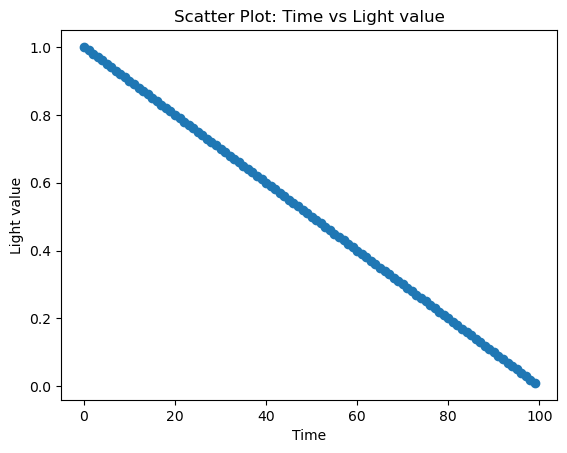

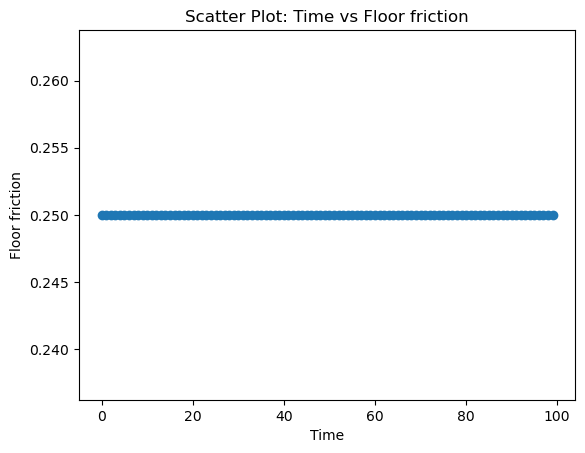

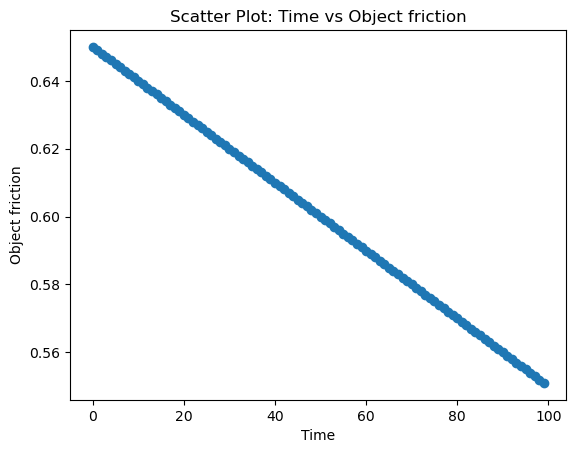

In [44]:
# Extract column names
columns = dfHist.columns

for i in range( 1, len(columns)):
    
    x_time = dfHist['Time']
    
    # Scatter plot time vs environmental values
    plt.scatter(x_time, dfHist[columns[i]])
    # Add labels and title
    plt.xlabel(columns[0])
    plt.ylabel(columns[i])
    plt.title(f'Scatter Plot: {columns[0]} vs {columns[i]}')
    # Show the plot
    plt.show()
    
    
    
    ADD NOISE for second run (add days in time??)
    Final outcome: Impose time on top of the violation/safe plot

Plot operat. param. and violation

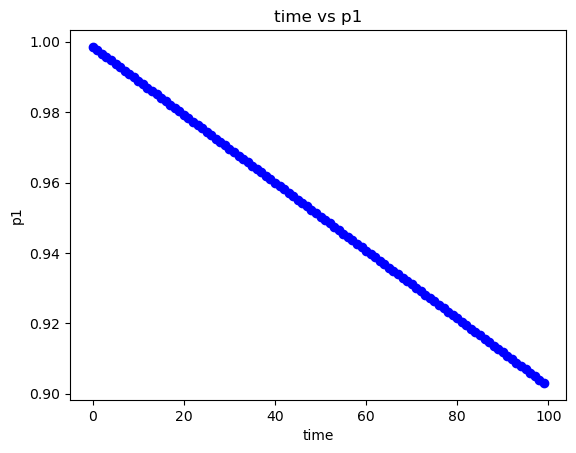

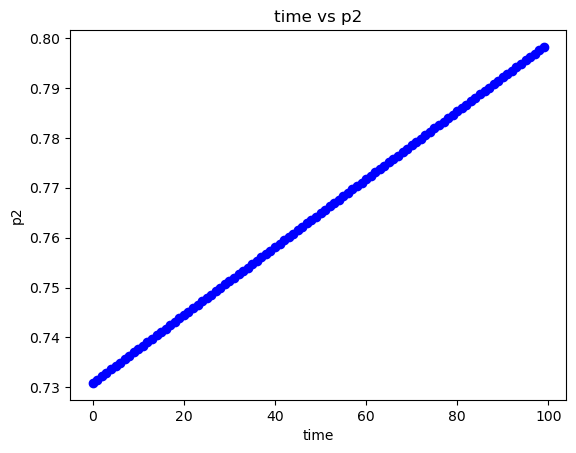

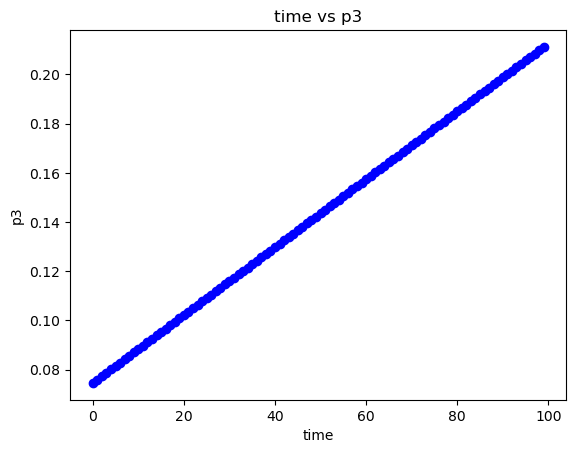

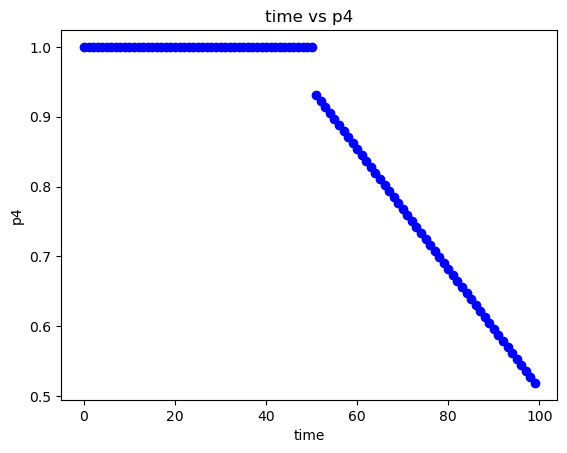

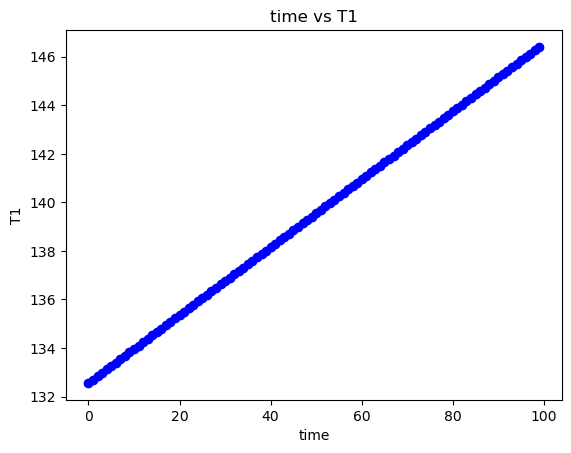

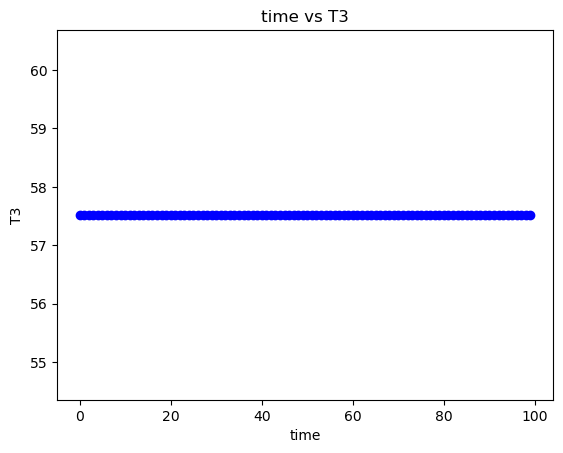

In [94]:
def plot_sys_time(sys_param):
    for index,row in dfHist.iterrows():
        x_timeValue = row['Time']

        # get system parameters
        systemParameterValues = getSystemParameters({
            'Light value':row['Light value'] ,
            'Object friction':row['Object friction'],
            'Floor friction':row['Floor friction']})

        # get param
        plt.xlabel("time")
        plt.ylabel(sys_param)
        plt.title("time vs "+sys_param)
        
        
        plt.plot(x_timeValue,systemParameterValues[sys_param], 'bo')
    plt.show()
    

for i in list(mapFunction1.keys()):
    plot_sys_time(i)

# 3 Get time to violation

Get time to system violation for any initial point=(light_t0, floor_t0, object_t0) and trend define in step 2.

## 3.1 Get time to violation, as well as for each of the requirements (in case if required later):

{'r1': 58.0, 'r2': -1, 'r3': 67.0}

In [ ]:
#Plot time vs violation

#NOTE: This is later converted into function "getTimeToViolation(dfHist)"

#Select variables in violation to plot:
_violation_vars = ["violation","r1","r2","r3"] # <--- in violation and requirements (0=safe, 1=in violation) 


for _vars in _violation_vars:
    # time to violation
    t_v=-1
    for index,row in dfHist.iterrows():
        x_timeValue = row['Time']
        # get system parameters
        systemParameterValues = getSystemParameters({
            'Light value':row['Light value'] ,
            'Object friction':row['Object friction'],
            'Floor friction':row['Floor friction']})
        # get violation
        [R1,R2,R3,r1,r2,r3,violation] = checkViolation(*list(systemParameterValues.values()))
        exec("y = {}".format(_vars)) # y axis is variable plot
        # check if in violation
        exec("in_violation = {}==1".format(_vars))
        if in_violation and t_v==-1:
            #save time
            t_v = x_timeValue
        # plot
        plt.plot(x_timeValue,y, 'bo')
        
    if _vars=="violation":
        plt.xlabel("time")
        plt.ylabel("System violation detected")
    else:
        plt.xlabel("time")
        plt.ylabel("Requirement " + _vars + " in violation")
    plt.title("time vs "+_vars+"\n (time to violation: "+str(t_v)+")")
    
    plt.show()

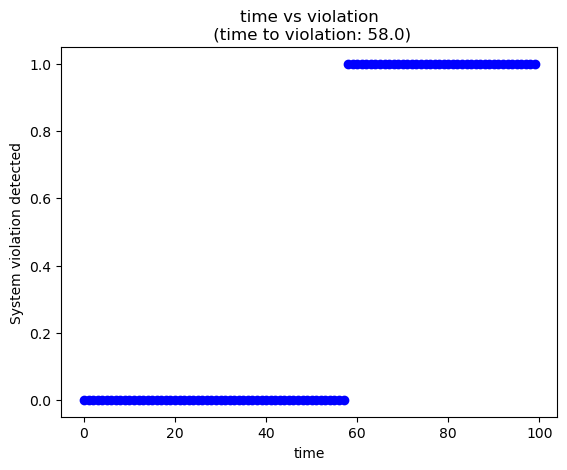

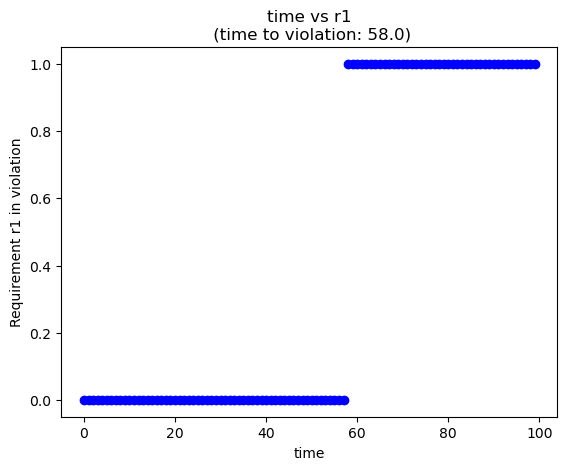

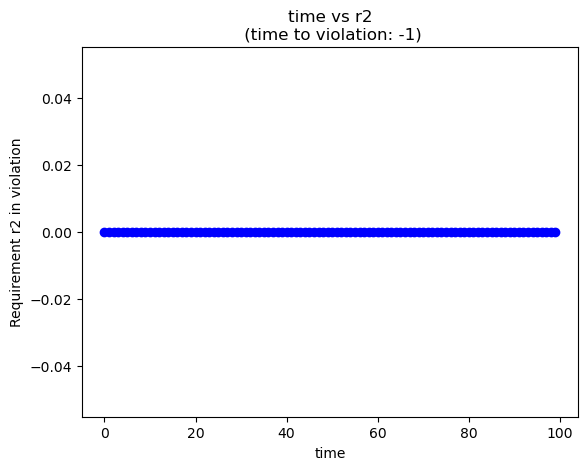

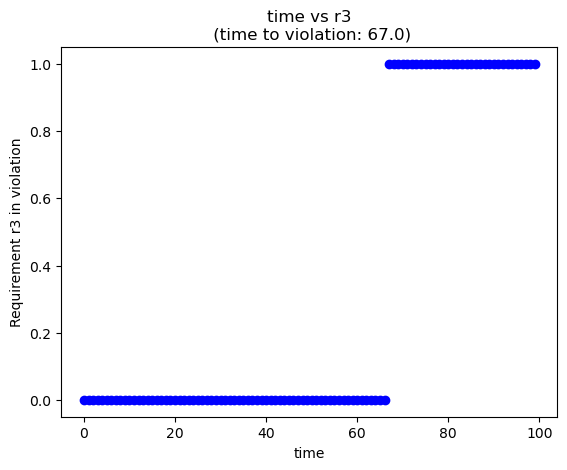

In [49]:
#Plot time vs violation

#Select variables in violation to plot:
_violation_vars = ["violation","r1","r2","r3"] # <--- in violation and requirements (0=safe, 1=in violation) 


for _vars in _violation_vars:
    #time to violation
    t_v=-1
    for index,row in dfHist.iterrows():
        x_timeValue = row['Time']
        # get system parameters
        systemParameterValues = getSystemParameters({
            'Light value':row['Light value'] ,
            'Object friction':row['Object friction'],
            'Floor friction':row['Floor friction']})
        # get violation
        [R1,R2,R3,r1,r2,r3,violation] = checkViolation(*list(systemParameterValues.values()))
        exec("y = {}".format(_vars)) # y axis is variable plot
        #check if in violation
        exec("in_violation = {}==1".format(_vars))
        if in_violation and t_v==-1:
            #save time
            t_v = x_timeValue
        #plot
        plt.plot(x_timeValue,y, 'bo')
        
    if _vars=="violation":
        plt.xlabel("time")
        plt.ylabel("System violation detected")
    else:
        plt.xlabel("time")
        plt.ylabel("Requirement " + _vars + " in violation")
    plt.title("time vs "+_vars+"\n (time to violation: "+str(t_v)+")")
    
    plt.show()

# 4 Get heatmap of time to boundary

### Get time for any combination of initial point=(light_t0, floor_t0, object_t0) and trend define in step 2.

### time2violation= (light_t0, floor_t0, object_t0, fix_trends)

### 4.1 Bring the functions back!

In [63]:
#Values from before:


#Ranges for values of light and frictions

light_range_values = [0,1] #min,max

floor_range_values = [0.2,1] #min,max

object_range_values = [0.4,1] #min,max

In [65]:
#Function from before:*

#*modified to stay in a max. or min. value of the environmental parameters if this means that the trend can't go further
#for example, the light is decreasing, from 0 to 1.
#the light can't take negative values, like -1, as 0 already means the light is off.
#hence, the trend stops at 0 and it's fixed from there

def getSystemParameters(env = {'Light value':0.7 , 'Object friction':0.8, 'Floor friction':0.7},
                        function1=function1,
                        fit_function=fit_function):

    
    values_systemParam={}
    
    light = env['Light value']
    frictionFloor = env['Floor friction']
    frictionObject = env['Object friction']
    
    sys_param = list(function1.keys()) #  ['p1', 'p2', 'p3', 'p4', 'T1', 'T1F', 'T2', 'T2F', 'TR', 'T3', 'Pretry']
    
    #BEFORE:
    #Check for Error in ranges   -- notice that ranges are added for safety
    #if light>light_range_values[1] or light<light_range_values[0]:
    #    print(Fore.RED +'ERROR in light range'); return -1
    #if frictionFloor>floor_range_values[1] or frictionFloor<floor_range_values[0]:  # if frictionFloor>1 or frictionFloor<0.7:
    #    print(Fore.RED +'ERRROR in floor range'); return -1
    #if frictionObject>object_range_values[1] or frictionObject<object_range_values[0]:
    #    print(Fore.RED +'ERROR in object range'); return -1
    
    #AFTER
    if light>light_range_values[1]:
        light=light_range_values[1]
    elif light<light_range_values[0]:
        light=light_range_values[0]
    if frictionFloor>floor_range_values[1]:
        frictionFloor=floor_range_values[1]
    elif frictionFloor<floor_range_values[0]:
        frictionFloor=floor_range_values[0]
    if frictionObject>object_range_values[1]:
        frictionObject=object_range_values[1]
    elif frictionObject<object_range_values[0]:
        frictionObject=object_range_values[0]


    
    # for: 'p1', 'p2', 'p3', 'p4', 'T1', 'T1F', 'T2', 'T2F', 'TR', 'T3', 'Pretry'
    for i in sys_param:
        function = function1[i] # function to sys. parameters
        
        #Special case: 'p4'
        if i=='p4':
            x = env[mapFunction1[i]]
            if x<0.6:
                y=8.6*x-4.22
            else:
                y = 1
            values_systemParam[i] = y
        
        else:
            # if not dependant
            if type(function) == float or type(function) == int:
                values_systemParam[i] = function

            # if dependant on one parameter
            elif type(function) == np.ndarray:
                x = env[mapFunction1[i]]
                values_systemParam[i] =fit_function(x , *function)
            # if dependant on two parameters
            elif type(function)== list:
                x_var1 = env[mapFunction1[i][0]]
                y_var1 =fit_function(x_var1 , *function[0])
                x_var2 = env[mapFunction1[i][1]]
                y_var2 =fit_function(x_var2 , *function[1])
                values_systemParam[i] = (y_var1+y_var2)/2
            else:
                print('ERROR, no recognised type for: ',i)
                return
        
    return values_systemParam  #e.g. {'p1': 0.9705606063500001, 'p2': 0.7988883516647872, 'p3': 0.11462071902572761, 'p4': 0.5100000000000007, 'T1': 126.73604750273007, 'T1F': 356.5555556, 'T2': 32.25871044, 'T2F': 59.03, 'TR': 65, 'T3': 43.23252494232394, 'Pretry': 0.6}
    
        
sp = getSystemParameters({'Light value':0.71 , 'Object friction':0.55, 'Floor friction':0.7})
sp

{'p1': 0.9705606063500001,
 'p2': 0.7988883516647872,
 'p3': 0.11462071902572761,
 'p4': 0.5100000000000007,
 'T1': 126.73604750273007,
 'T1F': 356.5555556,
 'T2': 32.25871044,
 'T2F': 59.03,
 'TR': 65,
 'T3': 43.23252494232394,
 'Pretry': 0.6}

In [ ]:
#Values from before:probSuccMin = 0.7 #0.5
tMax = 400
pFailMax = 0.16  #0.2

In [66]:
#Function from before:

def checkViolation(p1,p2,p3,p4,T1,T1F,T2,T2F,TR,T3,Pretry):
    violation = 0
    r1=0
    r2=0
    r3=0
    # compute R1-R3
    R1= (p1*p2*p4)/(1-Pretry*p3)
    R2= (p1*(p3*T2-p2*T3-p3*T2F-T1-T2+T1F)+Pretry*p3*(T1F-p1*TR-p1*T1F)-T1F) / (Pretry*p3-1)
    R3 = (p1*p2*(1-p4))/(1-Pretry*p3)
    # check violation   (i.e., does not comply with innequalities, hence innequality symbols are flipped)
    if R1 <= probSuccMin:
        violation = 1
        r1=1
    if R2 >= tMax:
        violation = 1
        r2=1
    if R3 >= pFailMax:
        violation = 1
        r3=1
    return [R1,R2,R3,r1,r2,r3,violation]
checkViolation(*list(sp.values()))

[0.4246421502854515, 220.06107430605223, 0.4079895169409229, 1, 0, 1, 1]

In [67]:
#create environmental data from init environmental values, trends and time window
def create_env_data_in_time_window(specifications):
    incr_time = specifications['incr_time']
    incr_light = specifications['incr_light']
    incr_floor = specifications['incr_floor']
    incr_obj = specifications['incr_obj']
    light_t0 = specifications['initLight']
    obj_t0 = specifications['initFloor']
    obj_t0 = specifications['initObj']
    timeWindow = specifications['timeWindow']
    
    # a)
    # initial time
    t0 = 0
    #time vector
    time  = np.arange(t0, t0 + timeWindow * incr_time, incr_time)
    #print('Time',time)
    
    #b) generate env. data in time window
    light = np.empty(timeWindow)
    floor = np.empty(timeWindow)
    obj = np.empty(timeWindow)

    #b.1 state at time t0
    light[0]=light_t0
    floor[0]=floor_t0
    obj[0]=obj_t0
    
    #b.2 save initial state to not modify in the next loop
    t1=t0
    light_t1 = light_t0
    floor_t1 = floor_t0
    obj_t1 = obj_t0
    
    #b.3 create env. data (linear models considered)
    for i in range(1,timeWindow):
        #next state at time t+1
        t2 = t1 + incr_time
        light_t2 = light_t1 + incr_light
        floor_t2 = floor_t1 + incr_floor
        obj_t2 = obj_t1 + incr_obj

        # light line:
        m = ((light_t2)-(light_t1))/((t2)-(t1))
        b = light_t2 - m*t2
        light[i] = m*t2 + b

        # floor line:
        m = ((floor_t2)-(floor_t1))/((t2)-(t1))
        b = floor_t2 - m*t2
        floor[i] = m*t2 + b

        # obj line:
        m = ((obj_t2)-(obj_t1))/((t2)-(t1))
        b = obj_t2 - m*t2
        obj[i] = m*t2 + b

        #update current state t=t+1
        t1=t2
        light_t1 = light_t2
        floor_t1 = floor_t2
        obj_t1 = obj_t2

    dfHist = pd.DataFrame(data = {'Time':time,'Light value':light,'Floor friction':floor,'Object friction':obj})
    return dfHist


#e.g.:
specifications = {'incr_time': 1,      # time increment
                  'incr_light': -0.01, # Light changing -0.001/1 sec (trend)
                  'incr_floor':  0.00, # Friction floor changing 0.00/1 sec. Trend:
                  'incr_obj':    0.00, # Friction object changing 0.00/1 sec. Trend:
                  'initLight':   1.00, # Initial conditions
                  'initFloor':   0.25, # Initial conditions
                  'initObj':     0.65 , # Initial conditions
                  'timeWindow' : 100   # Time window for checking violation
                 }

    
dfHist = create_env_data_in_time_window(specifications)
dfHist

Time  Light value  Floor friction  Object friction
0      0         1.00             0.2             0.65
1      1         0.99             0.2             0.65
2      2         0.98             0.2             0.65
3      3         0.97             0.2             0.65
4      4         0.96             0.2             0.65
..   ...          ...             ...              ...
95    95         0.05             0.2             0.65
96    96         0.04             0.2             0.65
97    97         0.03             0.2             0.65
98    98         0.02             0.2             0.65
99    99         0.01             0.2             0.65

[100 rows x 4 columns]

In [68]:
#Function from before:
def getTimeToViolation(dfHist):
    #get time to violation for requirements ri
    # -1 if no violation occurs in time window
    time_violation={"r1":-1,"r2":-1,"r3":-1}
    
    # for time i
    for index,row in dfHist.iterrows(): #each row in dfHist is a new time step
        time = row['Time']
        # get system parameters
        systemParameterValues = getSystemParameters({
            'Light value':row['Light value'] ,
            'Object friction':row['Object friction'],
            'Floor friction':row['Floor friction']})
        # get violation
        [R1,R2,R3,r1,r2,r3,violation] = checkViolation(*list(systemParameterValues.values()))
        
        # check if r1 first time in violation - r1
        if r1==1 and time_violation['r1']==-1:
            #save time
            time_violation["r1"]=time

        # check if r2 first time in violation - r2
        if r2==1 and time_violation['r2']==-1:
            #save time
            time_violation["r2"]=time

        # check if r3 first time in violation - r3
        if r3==1 and time_violation['r3']==-1:
            #save time
            time_violation["r3"]=time

        # if all violation times saved
        if time_violation['r1']!=-1 and time_violation['r2']!=-1 and time_violation['r3']!=-1:
            return time_violation
            
    return time_violation #e.g. {"r1":-1,"r2":-1,"r3":-1} if none in violation, otherwise time to violation

time_violation=getTimeToViolation(dfHist)
time_violation 

{'r1': -1, 'r2': -1, 'r3': -1}

### 4.2 Set up 

In [69]:
############# Set up

#a) set ranges
light_range_values = [0,1] #min,max
floor_range_values = [0.2,1] #min,max
object_range_values = [0.4,1] #min,max

#b) set step increments
_step = {'light':0.05, 'floor':0.05, 'obj':0.05}

#c) set trends
specifications = {'incr_time':incr_time,   #time to compute speed of change
                  'incr_light':incr_light, #speed of change
                  'incr_floor':incr_floor, #speed of change
                  'incr_obj':incr_obj,     #speed of change
                  'timeWindow' : tsize     #time window to check if violation happens
                 }

### 4.3 Save time to boundary

In [71]:
# 1) Create a new DataFrame  <-- Violation information dataframe
column_names = ["Init Light value","Init Floor friction", "Init Object friction", #<-- initial env. values
                "r1Time2violation","r2Time2violation","r3Time2violation", #<--  -1 if not reaches violation; 0 if in violation already; >0 time to violation
                "Init in violation", #<-- 0 not in violation; 1 in violation from beggining
                "time2violation"]    #<-- min. time to violation

df_HeatMap = pd.DataFrame(columns=column_names) #[Init Light value, Init Floor friction, Init Object friction, r1Time2violation, r2Time2violation, r3Time2violation, Init in violation, time2violation]


# 2) create all combinations of environmental initial values
light_x = np.arange(light_range_values[0],light_range_values[1],_step['light'])
floor_y = np.arange(floor_range_values[0],floor_range_values[1],_step['floor'])
obj_z   = np.arange(object_range_values[0],object_range_values[1],_step['obj'])

_rows = []


for light_t0 in light_x:  #create all combinations of initial values
    for floor_t0 in floor_y:
        for obj_t0 in obj_z:
            # add initial environmental variable values to 'specifications' of the problem to get time to violation
            specifications['initLight']=light_t0
            specifications['initFloor']=floor_t0
            specifications['initObj']=obj_t0

            # compute time to violations
            dfHist = create_env_data_in_time_window(specifications)
            time_violation=getTimeToViolation( dfHist ) #time_violation={"r1":-1,"r2":-1,"r3":-1} if none in violation, otherwise time to violation
            
            #check min time to violation
            if time_violation['r1']+time_violation['r2']+time_violation['r3']!=-3: #at least one in violation
                t = [x for x in [time_violation['r1'],time_violation['r2'],time_violation['r3']] if x != -1] #remove -1s          
                min_time_violation = min(t)
            else:
                min_time_violation = -1
            
            #check if initially in violation zone
            if time_violation['r1']==0 or time_violation['r2']==0 or time_violation['r3']==0: #at least one violated at time 0
                initially_in_violation=1
            else:
                initially_in_violation=0
            
            
            #add results
            _rows.append({
                #env
                'Init Light value':light_t0,
                'Init Floor friction':floor_t0,
                'Init Object friction':obj_t0,
                "r1Time2violation": time_violation['r1'],
                "r2Time2violation": time_violation['r2'],
                "r3Time2violation": time_violation['r3'],
                "Init in violation": initially_in_violation,
                "time2violation": min_time_violation
            })
            
            
df_HeatMap = pd.concat([df_HeatMap, pd.DataFrame(_rows)], ignore_index=True)
df_HeatMap.to_excel('_ViolationTable.xlsx', index=False)
df_HeatMap.head()




Init Light value  Init Floor friction  Init Object friction  \
0               0.0                  0.2                  0.40   
1               0.0                  0.2                  0.45   
2               0.0                  0.2                  0.50   
3               0.0                  0.2                  0.55   
4               0.0                  0.2                  0.60   

   r1Time2violation r2Time2violation  r3Time2violation Init in violation  \
0               0.0               -1               0.0                 1   
1               0.0               -1               0.0                 1   
2               0.0               -1               0.0                 1   
3               0.0               -1               0.0                 1   
4               7.0               -1              17.0                 0   

   time2violation  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             7.0

In [72]:
df_HeatMap

Init Light value  Init Floor friction  Init Object friction  \
0                 0.00                 0.20                  0.40   
1                 0.00                 0.20                  0.45   
2                 0.00                 0.20                  0.50   
3                 0.00                 0.20                  0.55   
4                 0.00                 0.20                  0.60   
...                ...                  ...                   ...   
3835              0.95                 0.95                  0.75   
3836              0.95                 0.95                  0.80   
3837              0.95                 0.95                  0.85   
3838              0.95                 0.95                  0.90   
3839              0.95                 0.95                  0.95   

      r1Time2violation r2Time2violation  r3Time2violation Init in violation  \
0                  0.0               -1               0.0                 1   
1                  0.0               -1               0.0                 1   
2                  0.0               -1               0.0                 1   
3                  0.0               -1               0.0                 1   
4                  7.0               -1              17.0                 0   
...                ...              ...               ...               ...   
3835               0.0               -1              -1.0                 1   
3836               0.0               -1              -1.0                 1   
3837               0.0               -1              -1.0                 1   
3838               0.0               -1              -1.0                 1   
3839               0.0               -1              -1.0                 1   

      time2violation  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                7.0  
...              ...  
3835             0.0  
3836             0.0  
3837             0.0  
3838             0.0  
3839             0.0  

[3840 rows x 8 columns]

# Plots

## Time to violation

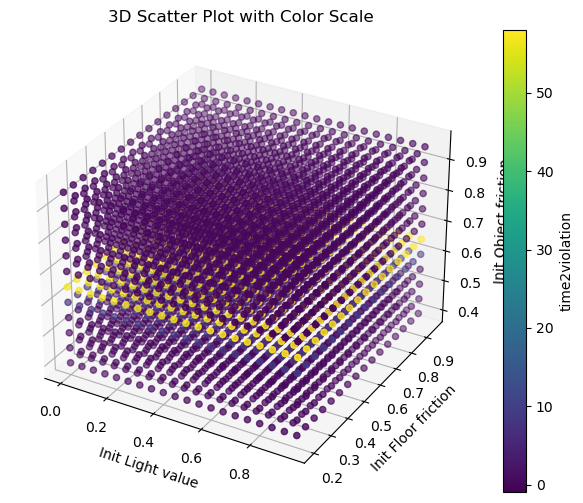

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extracting columns for x, y, z coordinates
x = df_HeatMap['Init Light value']
y = df_HeatMap['Init Floor friction']
z = df_HeatMap['Init Object friction']

# Color scale based on time2violation
c = df_HeatMap['time2violation']

# Scatter plot with color scale
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Adding colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('time2violation')

# Set labels for axes
ax.set_xlabel('Init Light value')
ax.set_ylabel('Init Floor friction')
ax.set_zlabel('Init Object friction')

plt.title('3D Scatter Plot with Color Scale')
plt.show()


## Safe Zone without risk of entering violation zone

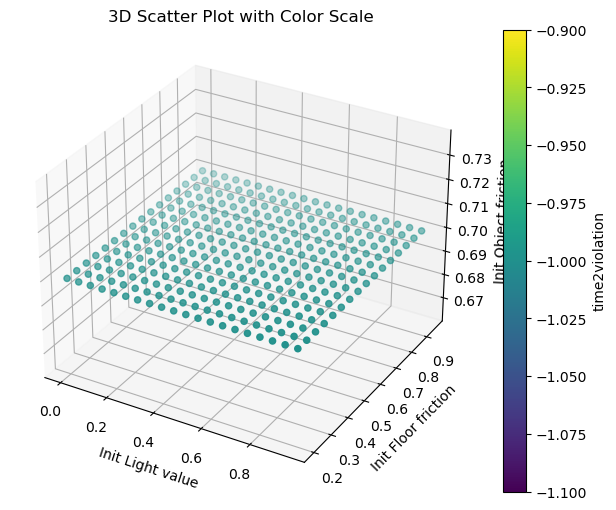

In [87]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


# Set limits for each axis
ax.set_xlim(light_range_values)
ax.set_ylim(floor_range_values)
ax.set_zlim(object_range_values)



# Exclude rows where 'time2violation' is -1
df = df_HeatMap.copy()

df = df[df['time2violation'] == -1]



# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extracting columns for x, y, z coordinates
x = df['Init Light value']
y = df['Init Floor friction']
z = df['Init Object friction']

# Color scale based on time2violation
c = df['time2violation']

# Scatter plot with color scale
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Adding colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('time2violation')

# Set labels for axes
ax.set_xlabel('Init Light value')
ax.set_ylabel('Init Floor friction')
ax.set_zlabel('Init Object friction')

plt.title('3D Scatter Plot with Color Scale')
plt.show()



## Violation Zone

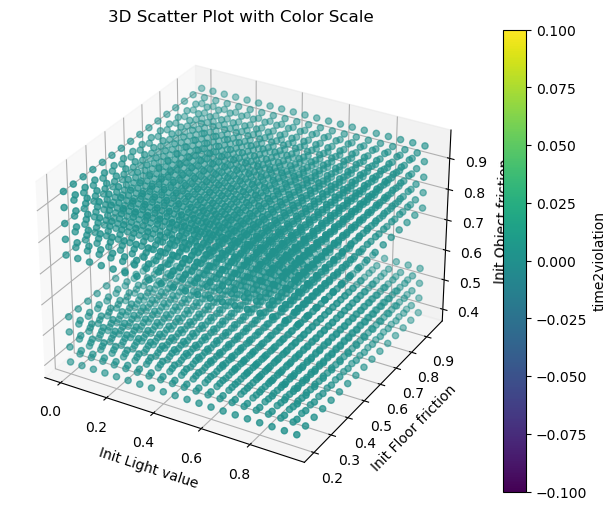

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Set limits for each axis
ax.set_xlim(light_range_values)
ax.set_ylim(floor_range_values)
ax.set_zlim(object_range_values)




# Exclude rows where 'time2violation' is -1
df = df_HeatMap.copy()

df = df[df['time2violation'] == 0]



# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extracting columns for x, y, z coordinates
x = df['Init Light value']
y = df['Init Floor friction']
z = df['Init Object friction']

# Color scale based on time2violation
c = df['time2violation']

# Scatter plot with color scale
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Adding colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('time2violation')

# Set labels for axes
ax.set_xlabel('Init Light value')
ax.set_ylabel('Init Floor friction')
ax.set_zlabel('Init Object friction')

plt.title('3D Scatter Plot with Color Scale')
plt.show()




## At risk of reaching the violation zone

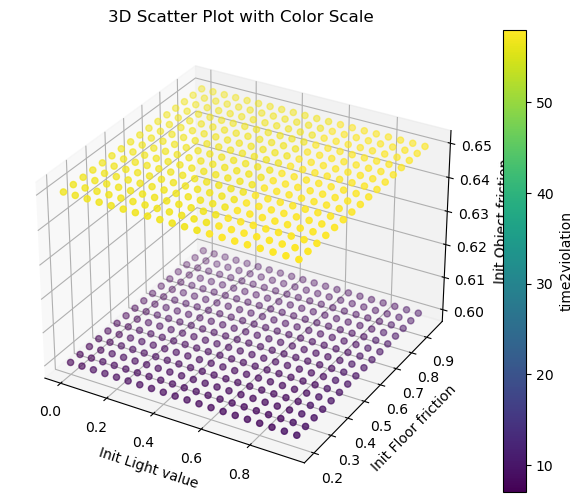

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Set limits for each axis
ax.set_xlim(light_range_values)
ax.set_ylim(floor_range_values)
ax.set_zlim(object_range_values)



# Exclude rows where 'time2violation' is -1
df = df_HeatMap.copy()

df = df[df['time2violation'] !=0]
df = df[df['time2violation'] !=-1]



# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extracting columns for x, y, z coordinates
x = df['Init Light value']
y = df['Init Floor friction']
z = df['Init Object friction']

# Color scale based on time2violation
c = df['time2violation']

# Scatter plot with color scale
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Adding colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('time2violation')

# Set labels for axes
ax.set_xlabel('Init Light value')
ax.set_ylabel('Init Floor friction')
ax.set_zlabel('Init Object friction')

plt.title('3D Scatter Plot with Color Scale')
plt.show()





In [23]:
#Try later ---

# Try later: plot for this given combination of trends ---
# plot time to the boundary for any combination of  state(t0)=light(t0),floor(t0),object(t0)
# as a 3D heatmap, or 2D choosing any 2 of 3 variables

# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=dfHist['Light value'],  # <-- Put your data instead
    y=dfHist['Object friction'],  # <-- Put your data instead
    z=dfHist['Floor friction'],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)